In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.ticker as ticker

In [201]:
data = pd.read_excel('data.xlsx')
data

,t_pir,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,"Тярк, С","Ттерм, С","Тярк, К","Ттерм, К","I, А","U, В","W, Вт",Unnamed: 13,T,Et
0,t_ter,NaN,NaN,NaN,NaN,NaN,900,937.38,1173.0,1210.38,0.527,1.53,0.80631,NaN,800.0,0.067
1,NaN,NaN,NaN,NaN,NaN,NaN,1000,1043.38,1273.0,1316.38,0.574,1.92,1.10208,NaN,900.0,0.081
2,t,860.0,NaN,NaN,NaN,NaN,1100,1149.38,1373.0,1422.38,0.628,2.42,1.51976,NaN,1000.0,0.105
3,t1,812.0,NaN,NaN,NaN,NaN,1200,1255.38,1473.0,1528.38,0.681,2.93,1.99533,NaN,1100.0,0.119
4,t2,793.0,NaN,NaN,NaN,NaN,1300,1361.38,1573.0,1634.38,0.750,3.63,2.72250,NaN,1200.0,0.133
5,NaN,NaN,NaN,NaN,NaN,NaN,1400,1467.38,1673.0,1740.38,0.787,4.03,3.17161,NaN,1300.0,0.144
6,NaN,NaN,NaN,NaN,NaN,NaN,1500,1573.38,1773.0,1846.38,0.857,4.81,4.12217,NaN,1400.0,0.164
7,NaN,NaN,NaN,NaN,NaN,NaN,1600,1679.38,1873.0,1952.38,0.901,5.33,4.80233,NaN,1500.0,0.179
8,NaN,NaN,NaN,NaN,NaN,NaN,1700,1785.38,1973.0,2058.38,0.974,6.24,6.07776,NaN,1600.0,0.195
9,NaN,NaN,NaN,NaN,NaN,NaN,1800,1891.38,2073.0,2164.38,1.103,7.45,8.21735,NaN,1700.0,0.209


In [212]:
T = np.array(data['Ттерм, К'])[:-3]
W = np.array(data['W, Вт'])[:-3]
T[7:12]

array([1952.38, 2058.38, 2164.38, 2270.38])

In [203]:
Tya = np.array([975, 1900])
Tt = np.array([1000, 1980])

C:\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


a =  1.0594594594594597
b =  -32.97297297297322
sigma_a =  inf
sigma_b =  inf
S_e =  3.314512409159136e-13
Relative S_r a = %  inf
Relative S_r b = %  inf


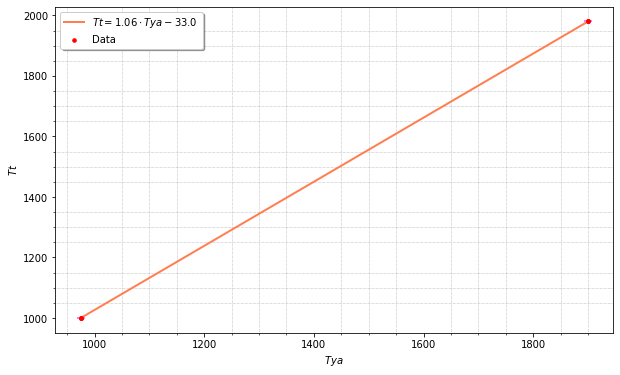

In [204]:
def approx(x, a, b):
    return a * x +b
beta_opt1, beta_cov1 = curve_fit(approx,Tya, Tt)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Tt - approx(Tya,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(Tya))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Tya, approx(Tya, *beta_opt1), 'coral', lw = 2)
ax.scatter(Tya, Tt, marker = '.', color = 'red', s = 50)
lgnd = ax.legend([r'$Tt = {:.3} \cdot Tya {:.3}$ '.format(a,b), 'Data'], loc='best', shadow=True)


ax.set_ylabel(r'$Tt$')
ax.set_xlabel(r'$Tya$ ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(Tya, Tt, fmt = 'ro', marker = '.', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('Tt.png', dpi=400, quality=100)
plt.show()

[ 800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900.
 2000.]
[0.067 0.081 0.105 0.119 0.133 0.144 0.164 0.179 0.195 0.209 0.223 0.236
 0.249]
a =  0.00015208791209242288
b =  -0.051076923083238183
sigma_a =  2.320027920504958e-06
sigma_b =  0.00336203991005348
S_e =  0.0028790789360253317
Relative S_r a = %  1.5254518841018025
Relative S_r b = %  6.582307052001717


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


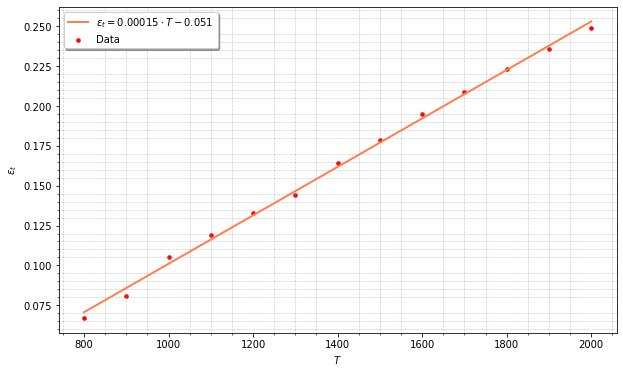

In [205]:
t = np.array(data['T'])[:-1]
print(t)
Et = np.array(data['Et'])[:-1]
print(Et)
def approx(x, a, b):
    return a * x +b
beta_opt1, beta_cov1 = curve_fit(approx,t,Et)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Et - approx(t,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(t))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, approx(t, *beta_opt1), 'coral', lw = 2)
ax.scatter(t, Et, marker = '.', color = 'red', s = 50)
lgnd = ax.legend([r'$\varepsilon_t = {:.2} \cdot T {:.2}$ '.format(a,b), 'Data'], loc='best', shadow=True)


ax.set_ylabel(r'$\varepsilon_t$')
ax.set_xlabel(r'$T$ ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('E_t.png', dpi=400, quality=100)
plt.show()

In [206]:
epsK = 0.00015*T-0.051
epsC = np.array(data['Et'])[1:12]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


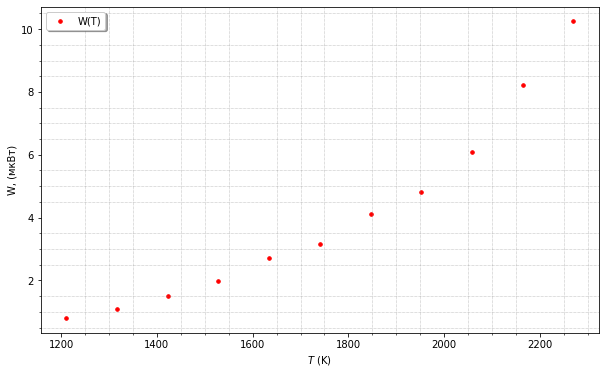

In [207]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(T, W, marker = '.', color = 'red', s = 50)
lgnd = ax.legend([r'W(T)'], loc='best', shadow=True)

ax.set_ylabel(r'W, (мкВт)')
ax.set_xlabel(r'$T$ (K)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)

# plt.xlim (-0.1, 5.5)
# plt.ylim (-0.5, 3)
plt.savefig('W(T).png', dpi=400, quality=100)
plt.show()

a =  3.6560655952745587e-13
sigma_a =  6.5353721953587045e-15
S_e =  0.2822158113756405
Relative S_r a = %  1.7875423799303904


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


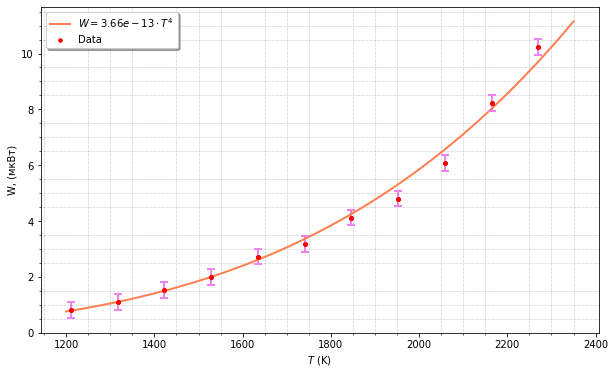

In [208]:
def approx(x, a):
    return a * x**4 
beta_opt1, beta_cov1 = curve_fit(approx,T,W)
a = beta_opt1[0]

print('a = ', a)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])

print('sigma_a = ', sigma_a)

residuals1 = W - approx(T,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(T))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(1200, 2350, 0.1)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(T, W, marker = '.', color = 'red', s = 50)
lgnd = ax.legend([r'$W = {:.2e} \cdot T^4 $ '.format(a), 'Data'], loc='best', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'W, (мкВт)')
ax.set_xlabel(r'$T$ (K)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(T, W, fmt = 'ro', marker = '.', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('W(t)fit2.png', dpi=400, quality=100)
plt.show()

a =  3.9241465172871597
b =  -26.75427728128393
sigma_a =  0.21243064342492854
sigma_b =  1.625885580642276
S_e =  0.016896101423098168
Relative S_r a = %  5.413422829374528
Relative S_r b = %  6.07710521778763


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


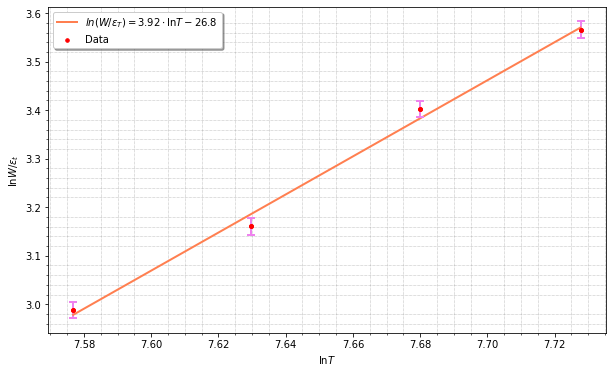

In [235]:

def approx(x, a, b):
    return a * x +b
beta_opt1, beta_cov1 = curve_fit(approx,np.log(T[7:12]),np.log(W[7:12]/epsK[7:12]))
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = np.log(W[7:12]/epsK[7:12]) - approx(np.log(T[7:12]),*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(np.log(T[7:12])))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log(T[7:12]), approx(np.log(T[7:12]), *beta_opt1), 'coral', lw = 2)
ax.scatter(np.log(T[7:12]), np.log(W[7:12]/epsK[7:12]), marker = '.', color = 'red', s = 50)
lgnd = ax.legend([r'$ln(W/\varepsilon_T) = {:.3} \cdot \ln T {:.3}$ '.format(a,b), 'Data'], loc='best', shadow=True)


ax.set_ylabel(r'$\ln W/\varepsilon_t$')
ax.set_xlabel(r'$\ln T$ ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(np.log(T[7:12]), np.log(W[7:12]/epsK[7:12]), fmt = 'ro', marker = '.', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('ln(We_t)1.png', dpi=400, quality=100)
plt.show()

a =  3.849155064279955
b =  -25.971765319897337
sigma_a =  0.21019606297174498
sigma_b =  1.6087827219085362
S_e =  0.016718362186571214
Relative S_r a = %  5.460836455313485
Relative S_r b = %  6.194352605966392


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


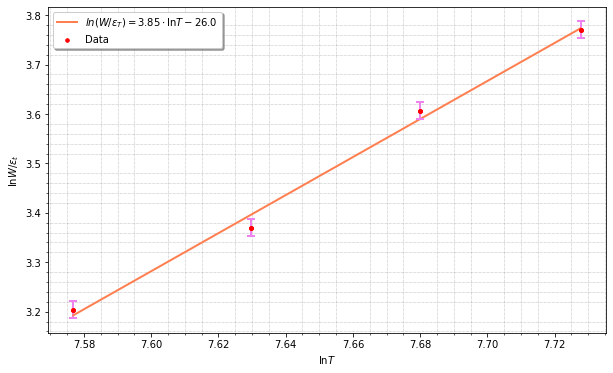

In [215]:
def approx(x, a, b):
    return a * x +b
beta_opt1, beta_cov1 = curve_fit(approx,np.log(T[7:12]),np.log(W[7:12]/epsC[7:12]))
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = np.log(W[7:12]/epsC[7:12]) - approx(np.log(T[7:12]),*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(np.log(T[7:12])))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log(T[7:12]), approx(np.log(T[7:12]), *beta_opt1), 'coral', lw = 2)
ax.scatter(np.log(T[7:12]), np.log(W[7:12]/epsC[7:12]), marker = '.', color = 'red', s = 50)
lgnd = ax.legend([r'$ln(W/\varepsilon_T) = {:.3} \cdot \ln T {:.3}$ '.format(a,b), 'Data'], loc='best', shadow=True)


ax.set_ylabel(r'$\ln W/\varepsilon_t$')
ax.set_xlabel(r'$\ln T$ ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(np.log(T[7:12]), np.log(W[7:12]/epsC[7:12]), fmt = 'ro', marker = '.', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('ln(We_t)2.png', dpi=400, quality=100)
plt.show()

In [243]:
s = 0.36/10000
print('epsK = ', epsK)
print('T[5:12] = ', T[7:12])
print('W[5:12] = ', W[7:12])
sigmaK = W[7:12]/s/epsK[7:12]/T[7:12]**4
print('sigmaK = ',sigmaK)
c = 3*10**8
kb = 1.38 * 10**(-23)
hreal = 6.626 * 10**(-34)

epsK =  [0.130557 0.146457 0.162357 0.178257 0.194157 0.210057 0.225957 0.241857
 0.257757 0.273657 0.289557]
T[5:12] =  [1952.38 2058.38 2164.38 2270.38]
W[5:12] =  [ 4.80233  6.07776  8.21735 10.2428 ]
sigmaK =  [3.79606322e-08 3.64861772e-08 3.80091952e-08 3.69817888e-08]


In [238]:
sigmaC = W[7:12]/s/epsC[7:12]/T[7:12]**4
print('epsС = ', epsC)
print('W[9:] = ',W[7:12] )
print('sigma2 = ', sigmaC)

epsС =  [0.081 0.105 0.119 0.133 0.144 0.164 0.179 0.195 0.209 0.223 0.236]
W[9:] =  [ 4.80233  6.07776  8.21735 10.2428 ]
sigma2 =  [4.70822802e-08 4.49979310e-08 4.66434185e-08 4.53743043e-08]


In [239]:
print('sigmaK=',np.mean(sigmaK))
print('sigmaC=',np.mean(sigmaC))

sigmaK= 3.7359448375627495e-08
sigmaC= 4.602448351796858e-08


In [260]:
# stats.sem(sigmaK)
# sigmaK.std()
sr = np.sqrt((np.sum((sigmaK - np.mean(sigmaK))**2)/len(sigmaK)/(len(sigmaK)-1)))
sr

3.7514688305590157e-10

In [250]:
stats.sem(sigmaK)/np.mean(sigmaK) * 100

1.0041553057315464

In [251]:
h = (2*np.pi**5 * kb**4/(15*c**2 * sigmaK))**(1/3)
h

array([7.56617124e-34, 7.66674804e-34, 7.56294753e-34, 7.63234525e-34])

In [252]:
np.mean(h)

7.607053015722147e-34

In [253]:
stats.sem(h)

2.5527446313111795e-36

In [87]:
stats.sem(h)/np.mean(h) * 100

1.1780879498663437

In [88]:
np.mean(h)/hreal

1.1561633687590551